# Punto 1 - EDA (Exploratory Data Analysis)

Este notebook contiene la exploración inicial de los datasets de tiendas (train y test)
para el parcial de Modelos Predictivos. Incluye análisis descriptivo, distribución de la variable target,
correlaciones y visualizaciones por categoría de tienda.


In [30]:
import pandas as pd

# Cargar datasets
df_train = pd.read_csv("../data/raw/Punto1.tiendas_100.csv")
df_test = pd.read_csv("../data/raw/Punto1.tiendas_10_no_target.csv")

df_train["malls"] = df_train["malls"].astype("category")
df_train["store_cat"] = df_train["store_cat"].astype("category")

df_train.head(), df_test.head()

(     Tienda       lat        lon store_cat    pop_100m     pop_300m  \
 0  Tienda_1  4.749160 -74.093470     super  334.954549   444.107181   
 1  Tienda_2  4.691439 -74.039200   express  283.656524   278.719607   
 2  Tienda_3  4.696289 -74.056088   express  468.458855  1014.339391   
 3  Tienda_4  4.645151 -74.068723     super  155.305253   387.144490   
 4  Tienda_5  4.724383 -74.110199   express  249.117040   596.660625   
 
       pop_500m  commerces  gas_stations malls  foot_traffic  car_traffic  \
 0   870.751484         12             0     0     50.000000    95.880873   
 1   893.404683          1             3     0     62.977613   159.508346   
 2  1210.112342         19             1     0    164.964682   157.989764   
 3   644.736732          1             0     0    116.989339    80.000000   
 4  1056.627802          4             0     0     88.726161    80.000000   
 
    socio_level  viviendas_100m  oficinas_100m  viviendas_pobreza  competencia  \
 0            4     

In [31]:
# Variables vacias
df_train.isnull().sum()

Tienda               0
lat                  0
lon                  0
store_cat            0
pop_100m             0
pop_300m             0
pop_500m             0
commerces            0
gas_stations         0
malls                0
foot_traffic         0
car_traffic          0
socio_level          0
viviendas_100m       0
oficinas_100m        0
viviendas_pobreza    0
competencia          0
tiendas_peq          0
ventas_m24           0
dtype: int64

In [32]:
# Estadísticas descriptivas del dataset de entrenamiento
df_train.describe().T

count         mean          std         min          25%  \
lat                100.0     4.709260     0.027718    4.644072     4.690457   
lon                100.0   -74.072886     0.026948  -74.123077   -74.094128   
pop_100m           100.0   383.824517   181.868340  138.863933   274.356794   
pop_300m           100.0   814.103235   381.040491  231.267271   550.382661   
pop_500m           100.0  1123.156733   559.169429  427.346335   782.302277   
commerces          100.0     7.040000     5.408411    1.000000     2.750000   
gas_stations       100.0     1.000000     1.100964    0.000000     0.000000   
foot_traffic       100.0   135.938711    78.119280   50.000000    68.071996   
car_traffic        100.0   195.604385   107.879128   80.000000   108.499482   
socio_level        100.0     3.550000     1.788713    1.000000     2.000000   
viviendas_100m     100.0   318.720000   193.569296   50.000000   198.750000   
oficinas_100m      100.0    75.760000    28.874903    5.000000    57.000000   
viviendas_pobreza  100.0    48.630000    33.670313    7.000000    22.750000   
competencia        100.0    26.750000    14.287365    2.000000    14.750000   
tiendas_peq        100.0    13.530000    11.250549    1.000000     4.000000   
ventas_m24         100.0  2655.691326  1525.403203  523.747234  1703.476914   

                           50%          75%           max  
lat                   4.711730     4.729506      4.777275  
lon                 -74.074422   -74.055584    -74.009685  
pop_100m            332.245479   455.087645   1160.341025  
pop_300m            763.703421   973.891956   2520.832325  
pop_500m            995.054142  1220.614368   3626.188716  
commerces             6.000000    11.000000     25.000000  
gas_stations          1.000000     2.000000      5.000000  
foot_traffic        134.380553   168.941057    435.400518  
car_traffic         163.937735   251.012010    576.665490  
socio_level           4.000000     5.000000      6.000000  
viviendas_100m      270.000000   372.500000   1329.000000  
oficinas_100m        73.000000    86.750000    172.000000  
viviendas_pobreza    42.500000    58.250000    184.000000  
competencia          27.000000    39.250000     49.000000  
tiendas_peq          11.000000    20.500000     44.000000  
ventas_m24         2347.831174  3285.361034  10500.000000

In [33]:
# Tipo de variable de la base de datos.

df_train.dtypes, df_test.dtypes

(Tienda                 object
 lat                   float64
 lon                   float64
 store_cat            category
 pop_100m              float64
 pop_300m              float64
 pop_500m              float64
 commerces               int64
 gas_stations            int64
 malls                category
 foot_traffic          float64
 car_traffic           float64
 socio_level             int64
 viviendas_100m          int64
 oficinas_100m           int64
 viviendas_pobreza       int64
 competencia             int64
 tiendas_peq             int64
 ventas_m24            float64
 dtype: object,
 Tienda                object
 lat                  float64
 lon                  float64
 store_cat             object
 pop_100m             float64
 pop_300m             float64
 pop_500m             float64
 commerces              int64
 gas_stations           int64
 malls                  int64
 foot_traffic         float64
 car_traffic          float64
 socio_level            int64
 vivi

In [34]:
# Categorias de "store_cat"

df_train['store_cat'].value_counts()

store_cat
super      46
mini       26
express    24
hiper       4
Name: count, dtype: int64

In [35]:
# Categorias de "malls"
df_train['malls'].value_counts()

malls
0    92
1     8
Name: count, dtype: int64

### Distribución de la variable target (`ventas_m24`)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

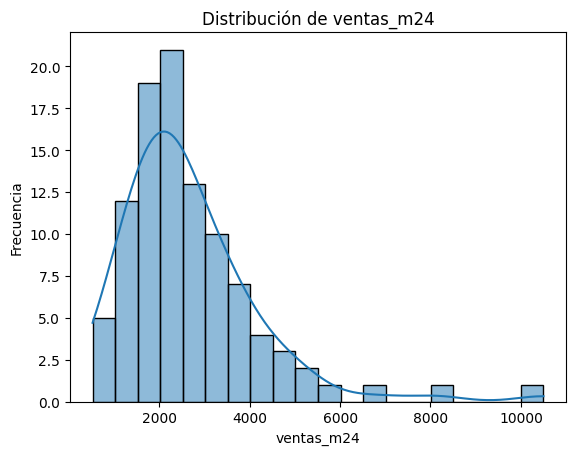

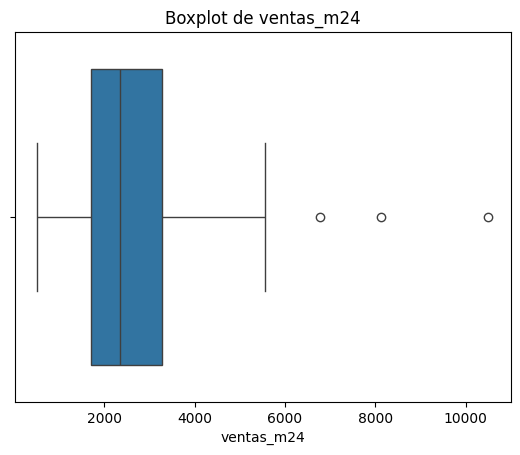

In [37]:
# Distribución de ventas (histograma + KDE)


sns.histplot(df_train['ventas_m24'], bins=20, kde=True)
plt.title('Distribución de ventas_m24')
plt.xlabel('ventas_m24')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de ventas
sns.boxplot(x=df_train['ventas_m24'])
plt.title('Boxplot de ventas_m24')
plt.xlabel('ventas_m24')
plt.show()

In [38]:
# Ver los datos con ventas mayores a 6000
df_train[df_train['ventas_m24'] > 6000].head(4)

Tienda       lat        lon store_cat     pop_100m     pop_300m  \
40  Tienda_41  4.716113 -74.082991     super   754.436614  1860.290756   
42  Tienda_43  4.711593 -74.069835     super  1160.341025  2520.832325   
98  Tienda_99  4.718613 -74.077884      mini   918.624085  1484.069149   

       pop_500m  commerces  gas_stations malls  foot_traffic  car_traffic  \
40  2709.214344          6             2     0    243.637468   532.691352   
42  3626.188716         25             4     1    435.400518   576.665490   
98  2587.778054         21             4     0    139.041136   471.105549   

    socio_level  viviendas_100m  oficinas_100m  viviendas_pobreza  \
40            5             620            134                127   
42            2            1329            172                184   
98            4             963            152                100   

    competencia  tiendas_peq    ventas_m24  
40           23           15   6778.570894  
42           45           34  10500.000000  
98           14            9   8117.247745

In [39]:
df_train[(df_train['ventas_m24'] < df_train['ventas_m24'] + df_train['ventas_m24']*0.1) & (df_train['ventas_m24'] > df_train['ventas_m24'] - df_train['ventas_m24']*0.1)].head(4)

Tienda       lat        lon store_cat    pop_100m     pop_300m  \
0  Tienda_1  4.749160 -74.093470     super  334.954549   444.107181   
1  Tienda_2  4.691439 -74.039200   express  283.656524   278.719607   
2  Tienda_3  4.696289 -74.056088   express  468.458855  1014.339391   
3  Tienda_4  4.645151 -74.068723     super  155.305253   387.144490   

      pop_500m  commerces  gas_stations malls  foot_traffic  car_traffic  \
0   870.751484         12             0     0     50.000000    95.880873   
1   893.404683          1             3     0     62.977613   159.508346   
2  1210.112342         19             1     0    164.964682   157.989764   
3   644.736732          1             0     0    116.989339    80.000000   

   socio_level  viviendas_100m  oficinas_100m  viviendas_pobreza  competencia  \
0            4             252             72                 16           49   
1            4             321              5                 70           10   
2            2             384             86                 89           24   
3            2              50             10                  8           39   

   tiendas_peq   ventas_m24  
0            1  1969.643815  
1            1  1629.323937  
2           23  3157.325481  
3            1   523.747234

## Análisis univariado de outliers

La variable`ventas_m24` tiene 3 casos outlier muy marcados (ventas >> resto, >8k–10k).

- Posibles hipermercados con ventas muy superiores al promedio (~2.6k).

- Estos puntos son outliers estructurales, no errores → representan tiendas de gran formato.

Por lo que no podemos usar modelos sensibles a los outlayers como regresiones lineales. Y **NO** los eliminaremos.


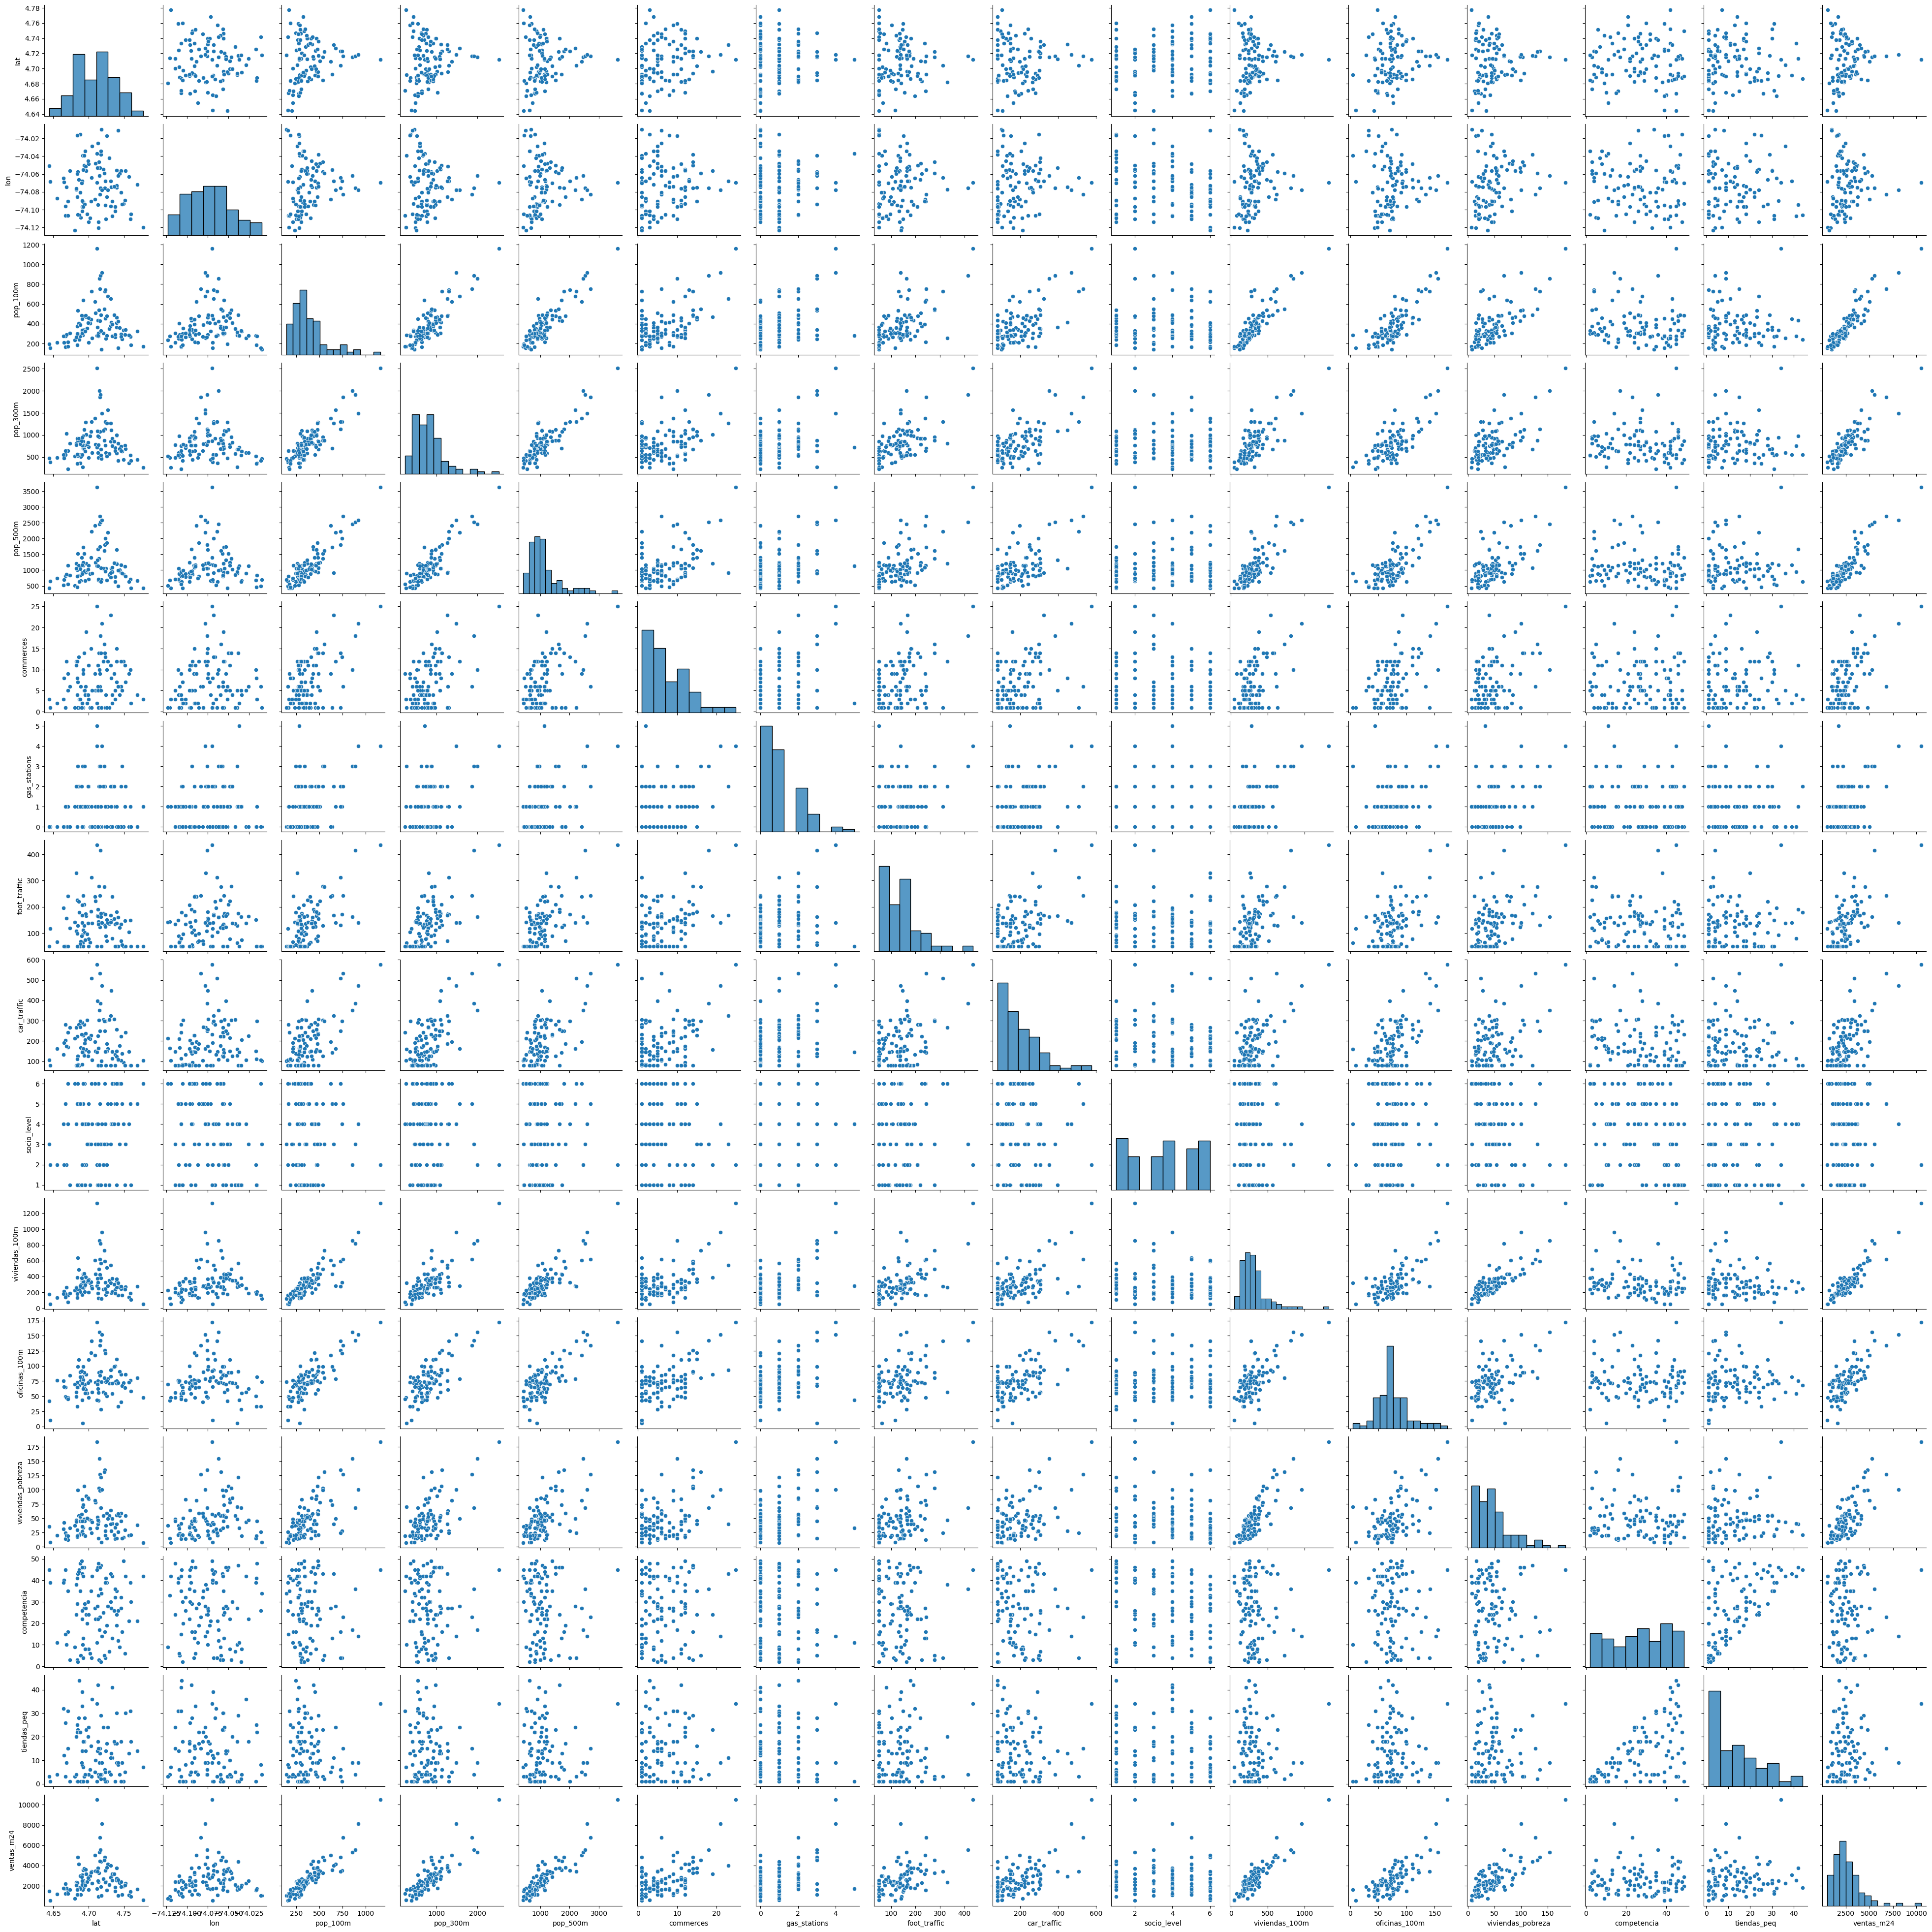

In [40]:
# Matriz de distribución de cada variable
sns.pairplot(df_train)


/home/thechieft/Documentos/ParcialDeFi4/.venv/lib64/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/thechieft/Documentos/ParcialDeFi4/.venv/lib64/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/thechieft/Documentos/ParcialDeFi4/.venv/lib64/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/thechieft/Documentos/ParcialDeFi4/.venv/lib64/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.

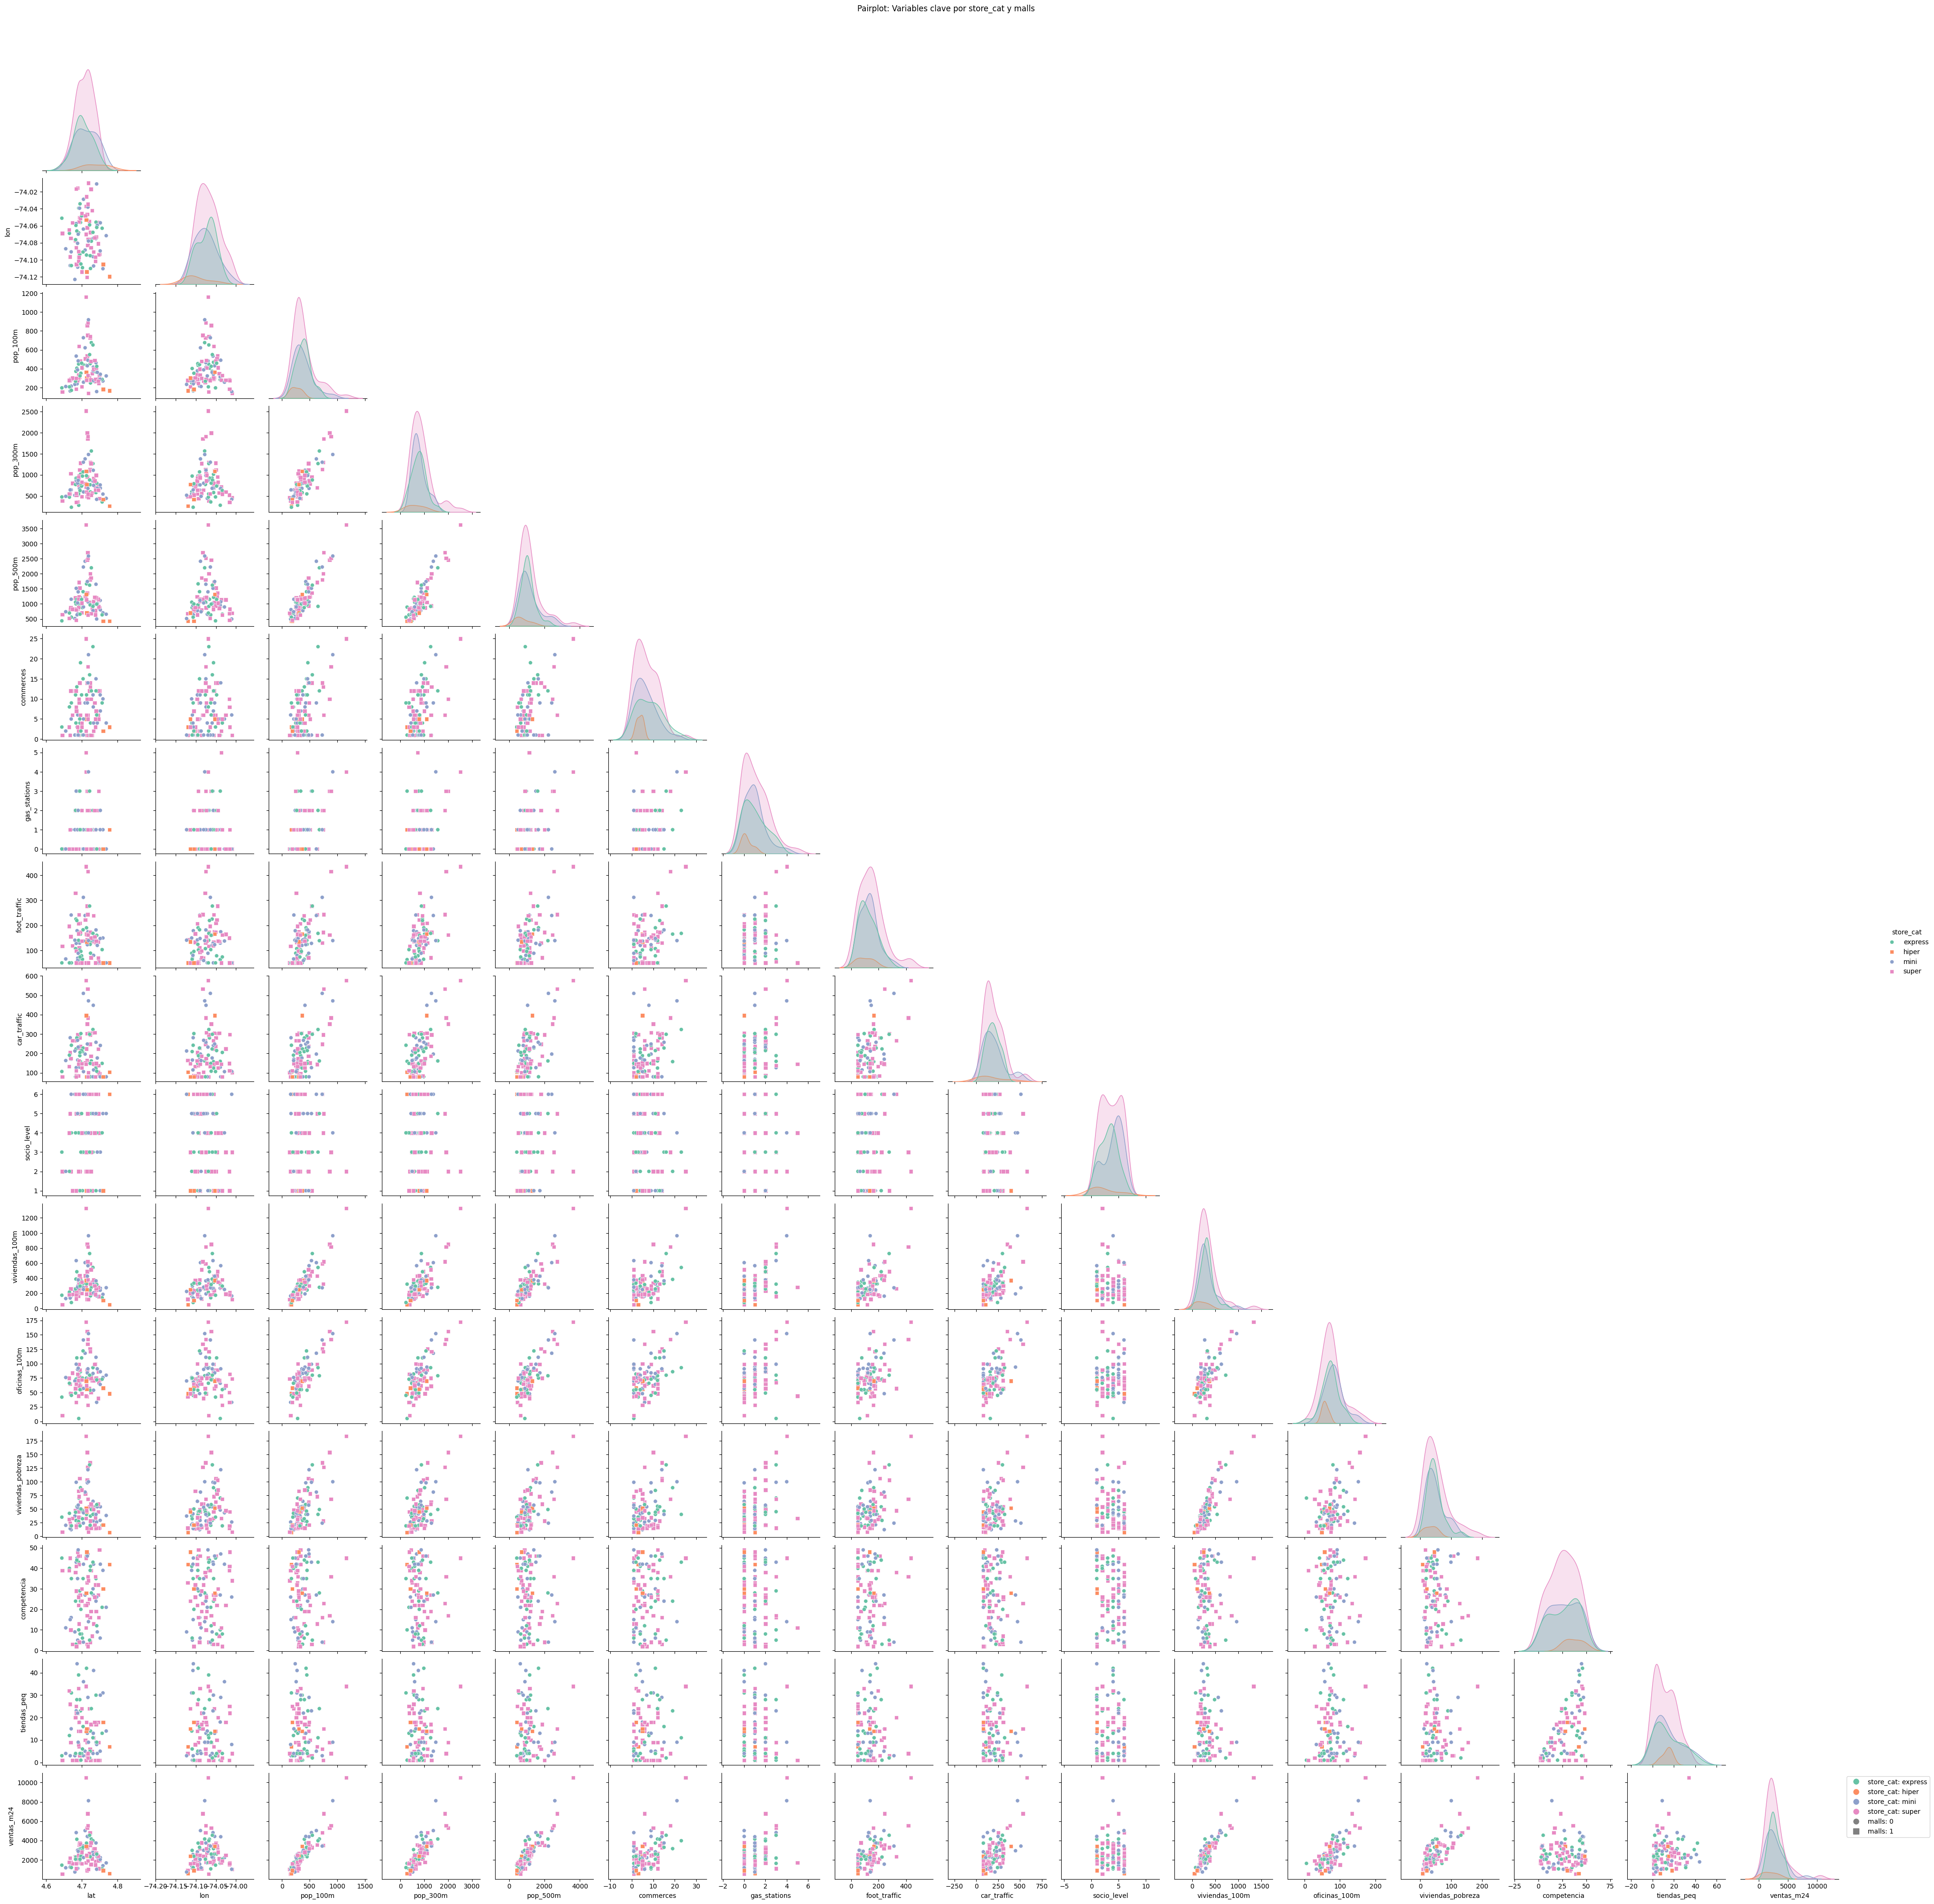

In [42]:
# Pairplot con colores por store_cat y markers por malls
g = sns.pairplot(
  df_train,
  hue="store_cat",
  markers=["o", "s"],  # dos markers (pero malls tiene 0 y 1, mapeamos abajo)
  palette="Set2",
  corner=True
)

plt.suptitle("Pairplot: Variables clave por store_cat y malls", y=1.02)

# Añadir leyenda manual para los markers de malls
import matplotlib.lines as mlines

handles = []
# Colores para cada categoría de store_cat
for cat, color in zip(df_train['store_cat'].cat.categories, sns.color_palette("Set2", n_colors=len(df_train['store_cat'].cat.categories))):
  handles.append(mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=8, label=f'store_cat: {cat}'))

# Markers para malls
handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=8, label='malls: 0'))
handles.append(mlines.Line2D([], [], color='gray', marker='s', linestyle='None', markersize=8, label='malls: 1'))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Matriz de correlación de variables numéricas

In [51]:
# Calcular correlaciones de ventas_m24 con todas las numéricas usando Pearson, Spearman y Kendall

correls_alt = {}
for col in df_train.select_dtypes(include=np.number).columns:
  x = df_train[col]
  y = df_train["ventas_m24"]
  corr_pearson = round(x.corr(y, method="pearson"), 3)
  corr_spearman = round(x.corr(y, method="spearman"), 3)
  corr_kendall = round(x.corr(y, method="kendall"), 3)
  correls_alt[col] = {
    "pearson": corr_pearson,
    "spearman": corr_spearman,
    "kendall": corr_kendall
  }

corr_alt_df = pd.DataFrame(correls_alt).T
corr_alt_df["abs_pearson"] = corr_alt_df["pearson"].abs()
top_corrs_alt = corr_alt_df.sort_values("abs_pearson", ascending=False).head(10)
top_corrs_alt


pearson  spearman  kendall  abs_pearson
ventas_m24           1.000     1.000    1.000        1.000
viviendas_100m       0.923     0.842    0.677        0.923
pop_100m             0.911     0.888    0.715        0.911
pop_500m             0.900     0.858    0.684        0.900
pop_300m             0.863     0.838    0.653        0.863
viviendas_pobreza    0.780     0.705    0.524        0.780
oficinas_100m        0.762     0.652    0.479        0.762
car_traffic          0.642     0.476    0.338        0.642
foot_traffic         0.601     0.565    0.399        0.601
commerces            0.556     0.389    0.281        0.556

###  Relaciones directas con la variable objetivo

`viviendas_100m`, `pop_100m`, `pop_300m`, `pop_500m`:

Pearson, Spearman y Kendall altos (~0.9 / 0.84 / 0.68).

Presentand una **relación fuerte** y **monótona positiva** → a mayor población y viviendas cerca, mayores ventas, de forma bastante consistente y casi lineal.

Más gente cerca → más clientes potenciales → más ventas.

`viviendas_pobreza` (0.78 / 0.71 / 0.52):

También relación positiva clara.

Pero más dispersión: probablemente hay zonas con alta pobreza pero bajo consumo, lo que reduce linealidad.

`Oficinas_100m` (0.76 / 0.65 / 0.48):

Relación moderada.

Puede ser monótona creciente: más oficinas cerca generan flujo de clientes → pero no siempre se traduce en ventas directas (ej. oficinas en zonas industriales).

`car_traffic` y `foot_traffic` (~0.64 / 0.48 / 0.34 y ~0.60 / 0.56 / 0.39):

Pearson moderado, Spearman/Kendall más bajos.

Indica que hay tendencia creciente (más tráfico → más ventas), pero no estrictamente monótona: hay casos de alto tráfico con ventas bajas (quizás por competencia fuerte o tipo de tienda).

`commerces` y `gas_stations`:

Correlaciones bajas (<0.55 Pearson, mucho menores en Spearman/Kendall).

No hay relación monotónica clara → estos factores no determinan las ventas directamente.

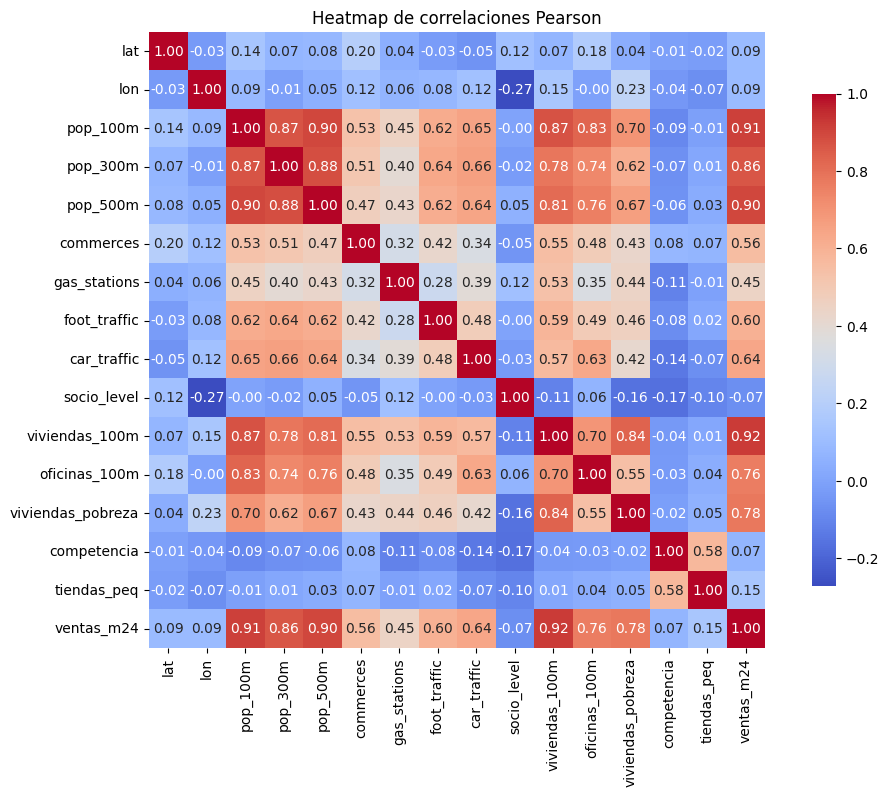

In [52]:
# Calcular correlaciones entre todas las numéricas usando Pearson mostrandola en un headmap
corr_matrix = df_train.select_dtypes(include=np.number).corr(method="pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap de correlaciones Pearson")
plt.show()

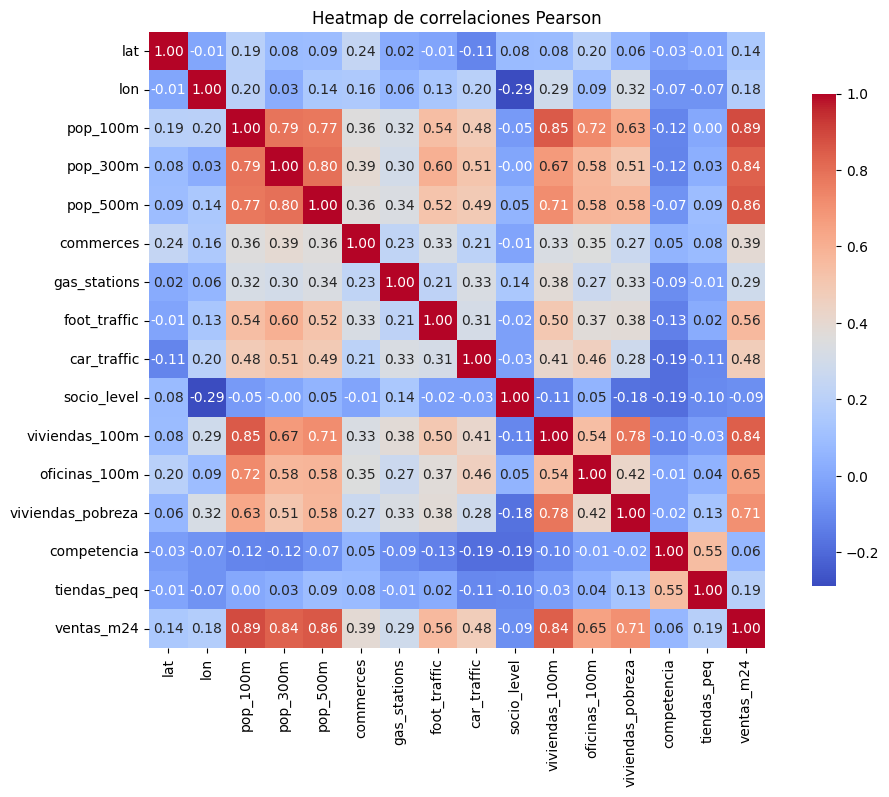

In [ ]:
# Calcular correlaciones entre todas las numéricas usando spearman mostrandola en un headmap
corr_matrix = df_train.select_dtypes(include=np.number).corr(method="spearman")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap de correlaciones Spearman")
plt.show()

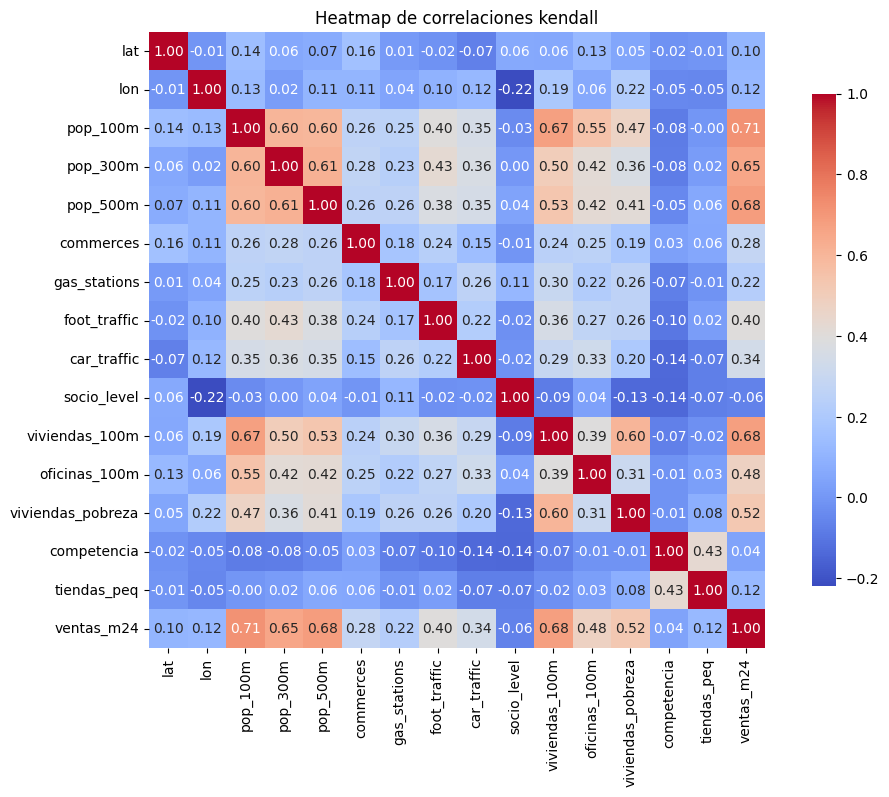

In [54]:
# Calcular correlaciones entre todas las numéricas usando kendall mostrandola en un headmap
corr_matrix = df_train.select_dtypes(include=np.number).corr(method="kendall")
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap de correlaciones kendall")
plt.show()

### Comparación entre todas las variables

- **Alta multicolinealidad** entre las 3 poblaciones (`pop_100m`, `pop_300m`, `pop_500m`) y `viviendas_100m`. (>0.85 Pearson). Toca evitar modelos con problemas de multicolinealidad.
- **Colinaalidad media** entre `foot_traffic` y `car_traffic`. Pueden aportar al modelo
- Pueden encontrarse variables interesantes de competencia `commerces`, `competencia`, `tiendas_peq` estas variables se correlacionan entre sí → más comercios suele implicar más tiendas pequeñas y más competencia. Pero su relación con ventas no es siempre positiva → puede incluso ser no monótona (ej. más competencia puede reducir ventas si la zona ya está saturada).

### Distribución de ventas por categoría de tienda

<Axes: xlabel='store_cat', ylabel='ventas_m24'>

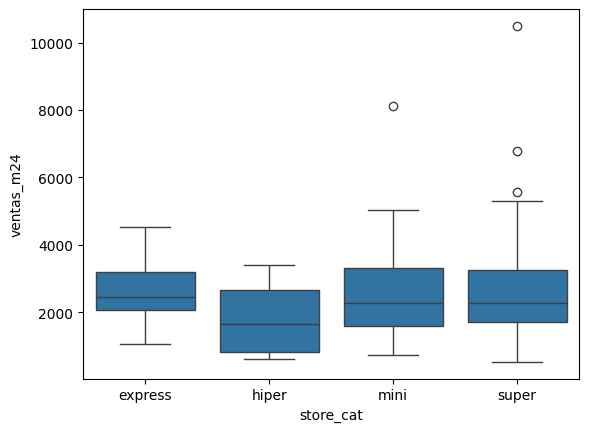

In [55]:
sns.boxplot(x='store_cat', y='ventas_m24', data=df_train)

<Axes: xlabel='malls', ylabel='ventas_m24'>

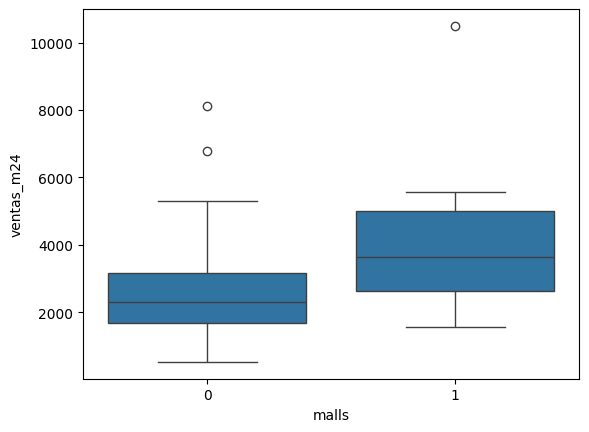

In [56]:
sns.boxplot(x='malls', y='ventas_m24', data=df_train)

### Análisis bivariado con la variable objetivo y categoricas

Para `ventas_m24` vs `store_cat`
- La categoría no explica por sí sola las ventas.
- Super y Mini dominan, pero los hiper pueden ser inconsistentes.
- Los outliers extremos están en super

Para `ventas_m24` vs `malls` 
- Estar dentro/cerca de un mall está asociado a ventas mayores y más dispersión.
- Aunque solo hay 8 casos, la diferencia es muy marcada → puede ser una variable muy influyente.

## Outliers y segmentación

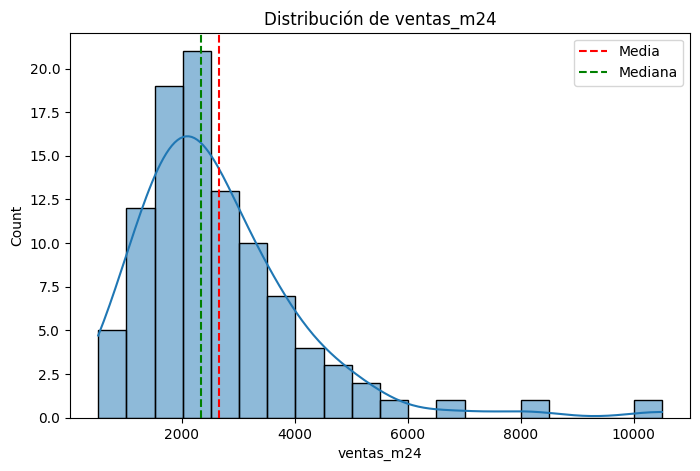

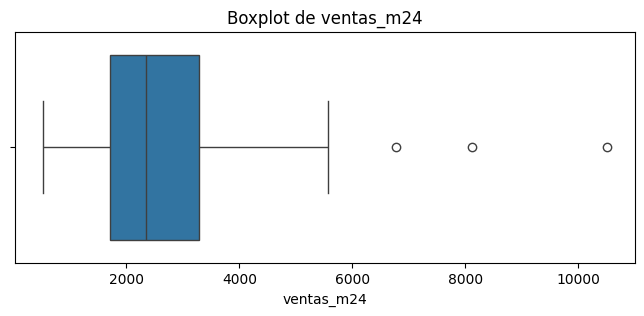

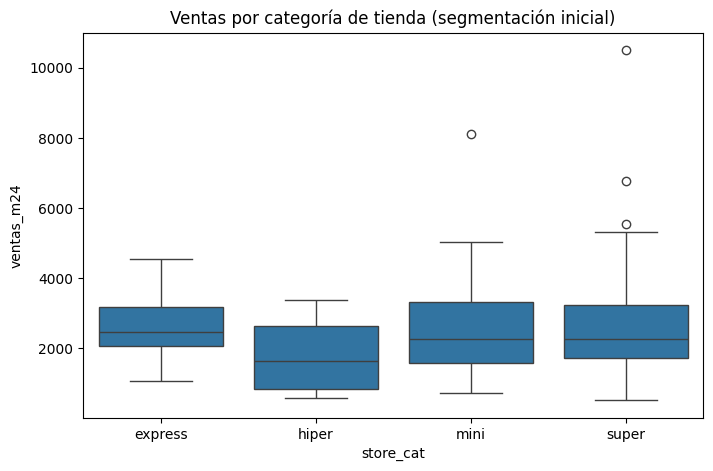

Tienda store_cat    ventas_m24
40  Tienda_41     super   6778.570894
42  Tienda_43     super  10500.000000
98  Tienda_99      mini   8117.247745

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de ventas
plt.figure(figsize=(8,5))
sns.histplot(df_train["ventas_m24"], bins=20, kde=True)
plt.axvline(df_train["ventas_m24"].mean(), color="red", linestyle="--", label="Media")
plt.axvline(df_train["ventas_m24"].median(), color="green", linestyle="--", label="Mediana")
plt.legend()
plt.title("Distribución de ventas_m24")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df_train["ventas_m24"])
plt.title("Boxplot de ventas_m24")
plt.show()

# Identificar outliers usando IQR
Q1 = df_train["ventas_m24"].quantile(0.25)
Q3 = df_train["ventas_m24"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train["ventas_m24"] < lower_bound) | (df_train["ventas_m24"] > upper_bound)]

# Ver segmentación básica por store_cat
plt.figure(figsize=(8,5))
sns.boxplot(x="store_cat", y="ventas_m24", data=df_train)
plt.title("Ventas por categoría de tienda (segmentación inicial)")
plt.show()

outliers[["Tienda","store_cat","ventas_m24"]]


### Análisis de outlayers y categorias

- Con este pequeño análisis concluimos que realmente estas variables outlayers son estructurales. 
- **Prodriamos** Trabajar con log(ventas_m24) para estabilizar.
- Probar modelos segmentados (ej. entrenar separado por store_cat).
- Crear variable “flag outlier” (ventas > Q3 + 1.5·IQR) para que el modelo sepa que son casos especiales.

## Competencia y las ventas

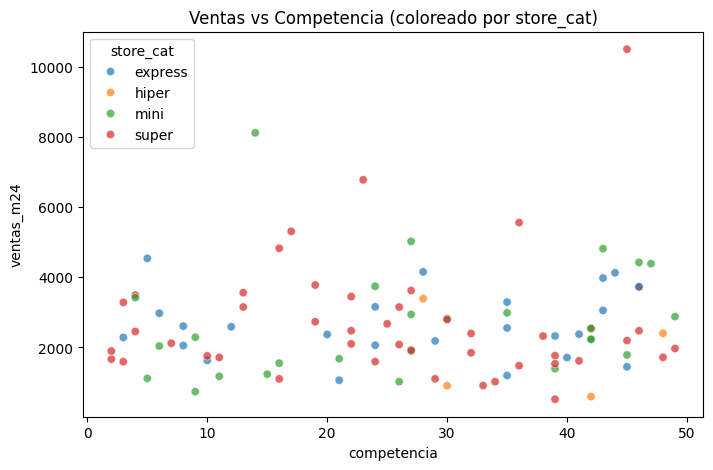

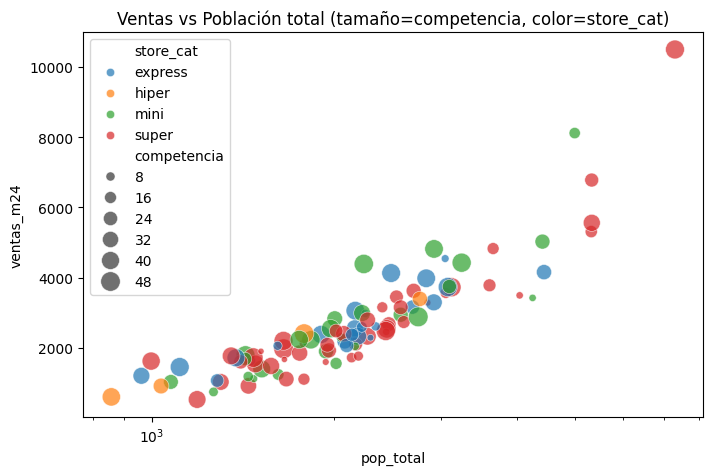

{'pearson': np.float64(0.06685330058639599),
 'spearman': np.float64(0.06427039074308515),
 'kendall': np.float64(0.04037698026350746)}

In [66]:
# Scatter competencia vs ventas
plt.figure(figsize=(8,5))
sns.scatterplot(x="competencia", y="ventas_m24", hue="store_cat", data=df_train, alpha=0.7)
plt.title("Ventas vs Competencia (coloreado por store_cat)")
plt.show()

# Interacción población x competencia
df_train["pop_total"] = df_train["pop_100m"] + df_train["pop_300m"] + df_train["pop_500m"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="pop_total", y="ventas_m24", size="competencia", hue="store_cat", data=df_train, alpha=0.7, sizes=(20,200))
plt.title("Ventas vs Población total (tamaño=competencia, color=store_cat)")
plt.xscale("log")
plt.show()

# Correlaciones de competencia con ventas
corr_competencia = {
    "pearson": df_train["competencia"].corr(df_train["ventas_m24"], method="pearson"),
    "spearman": df_train["competencia"].corr(df_train["ventas_m24"], method="spearman"),
    "kendall": df_train["competencia"].corr(df_train["ventas_m24"], method="kendall"),
}

corr_competencia


### Análisis de competencia y ventas

- **La competencia NO explica las ventas** practicamente vemos que no hay tendencia clara, alta competencia o no no nos muestra nada. En zonas densas, aunque haya mucha competencia (círculos grandes), las ventas siguen siendo altas. En zonas con poca población, incluso con baja competencia, las ventas son bajas.
- Se ve que la población **SI** impulsa las ventas.

Por lo que podemos hacer una variable de `features de intereacción` = ventas ~ población / (competencia+1) (Captar la saturación del mercado) y que `competencia` NO es predictor directo.


# Feature engineering

In [70]:
import numpy as np

# --- helpers ---
def add_features(df):
    df = df.copy()
    # Sanitizar potenciales NaN que podrían romper divisiones
    for col in ["pop_100m","pop_300m","pop_500m","competencia","oficinas_100m","viviendas_100m"]:
        if col in df.columns:
            df[col] = df[col].astype(float)

    comp = (df["competencia"].fillna(0) + 1.0)

    # Población total
    df["pop_total"] = df["pop_100m"].fillna(0) + df["pop_300m"].fillna(0) + df["pop_500m"].fillna(0)

    # Ratios población/competencia
    df["pop_comp_100m"]  = df["pop_100m"].fillna(0)  / comp
    df["pop_comp_300m"]  = df["pop_300m"].fillna(0)  / comp
    df["pop_comp_500m"]  = df["pop_500m"].fillna(0)  / comp
    df["pop_comp_total"] = df["pop_total"]           / comp

    # Ratios oficinas/viviendas por competencia
    df["oficinas_comp"]  = df["oficinas_100m"].fillna(0)  / comp
    df["viviendas_comp"] = df["viviendas_100m"].fillna(0) / comp

    # Tipos útiles
    if "store_cat" in df.columns:
        df["store_cat"] = df["store_cat"].astype("category")
    if "malls" in df.columns:
        df["malls"] = df["malls"].astype("int8")

    return df

# Aplicar a train/test
df_train_feat = add_features(df_train)
df_test_feat  = add_features(df_test)

# Outliers SOLO con train (usando límites calculados en train)
df_train_feat["is_outlier"] = (df_train_feat["ventas_m24"] > upper_bound).astype("int8")

# (Opcional) Ordenar columnas para que train y test tengan el mismo orden base
base_cols = [c for c in df_train_feat.columns if c not in ["ventas_m24","is_outlier"]]
ordered_train = base_cols + ["ventas_m24","is_outlier"]
ordered_test  = base_cols

df_train_feat = df_train_feat[ordered_train]
df_test_feat  = df_test_feat[ordered_test]

# Guardar
df_train_feat.to_csv("../data/clean/Punto1.tiendas_100_clean.csv", index=False)
df_test_feat.to_csv("../data/clean/Punto1.tiendas_10_no_target_clean.csv", index=False)
